In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MUSHROOM CLASSIFICATION: CAN WE EAT IT?

<img src="https://www.avogel.co.uk/images/mushrooms-intro.jpg?id=33179&time=1481905014" alt="Picture of some mushrooms">


*  **Dataset:** "Mushroom Classification"
* *https://www.kaggle.com/uciml/mushroom-classification*
* **Last Update:** 30/11/2017

### Examining the Dataset... ### 

The first thing to do so is load in the dataset and see what we are working with. Let's do that now...

In [15]:
data = pd.read_csv("./mushrooms.csv")

print("Values in Veil-Type:", data["veil-type"].unique())
# Since "veil-type" only has a single value in our dataset ("p") we shall drop it from our data.
del data["veil-type"]
print("SHAPE =", data.shape)
data.head()

Values in Veil-Type: ['p']
SHAPE = (8124, 22)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


After removing the 'veil-type' column (which had zero predictive value) we are left with 22 columns and 8124 rows. It turns out that all of the columns are categorical (as opposed to numerical) data. The below table explains what the various categories are:

**Feature**      | **Explanation** 
:-------------      | :-----------------------------------------
**Class (our target):** | edible=e, poisonous=p
cap-shape: |bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: |fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: |brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises:| bruises=t,no=f
odor: |almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment:| attached=a,descending=d,free=f,notched=n
gill-spacing:| close=c,crowded=w,distant=d
gill-size: |broad=b,narrow=n
gill-color: |black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: |enlarging=e,tapering=t
stalk-root: |bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring:| fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring:| fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring:| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring:| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type:| partial=p,universal=u
veil-color:| brown=n,orange=o,white=w,yellow=y
ring-number:| none=n,one=o,two=t
ring-type:| cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color:| black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population:| abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat:| grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Converting to Numerical Data ###

If we convert our categorical data into numerical data (e.g poisonous = 1, edible = 0) then we have a greater selection of machine learning algorithms at our disposal. "new_data" shall be a copy of data but where we have made the aforementioned change. 

To do this we shall use Sklearn's 'label encoder'. This process with convert all the categories within a row into integers; ["a", "b", "c"] --> [0, 1, 2]

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

new_data = pd.DataFrame()
for c in data.columns:
    le.fit(data[c])
    new_data[c] = le.transform(data[c])

new_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Before moving on, lets explore the values a bit more. In the table below the rows are the features (cap-shape, cap-colour, etc) and columns represent the value count of each unique classification. 

In [17]:
cols = set()
for i in new_data.columns:
    for j in new_data[i].unique():
        cols.add(j)
cols = sorted(list(cols))

value_count_data = pd.DataFrame(columns=cols)

for x in new_data.columns:
    value_count_data.loc[x] = new_data[x].value_counts()

value_count_data

,0,1,2,3,4,5,6,7,8,9,10,11
class,4208.0,3916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape,452.0,4.0,3152.0,828.0,32.0,3656.0,NaN,NaN,NaN,NaN,NaN,NaN
cap-surface,2320.0,4.0,2556.0,3244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-color,168.0,44.0,1500.0,1840.0,2284.0,144.0,16.0,16.0,1040.0,1072.0,NaN,NaN
bruises,4748.0,3376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odor,400.0,192.0,2160.0,400.0,36.0,3528.0,256.0,576.0,576.0,NaN,NaN,NaN
gill-attachment,210.0,7914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-spacing,6812.0,1312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-size,5612.0,2512.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-color,1728.0,96.0,752.0,732.0,408.0,1048.0,64.0,1492.0,24.0,492.0,1202.0,86.0


Lets explain this table in a bit more detail. To do that, let's make an even smaller table:

**Feature**|0|1|2|3|4|5 
:-------------      | :-----------------------------------------
  Class    |4208|3916|NaN |NaN |NaN |NaN 
  veil-color|96  |96  |7924|8   |NaN |NaN 
  cap-surface|2320|4   |2556|3244|NaN |NaN	
 
Here we can see our 'class' feature has two unique values in the dataset (0, 1); since edible was transformed to zero this table is telling us that there are 4208 edible mushrooms in our database. 

**Please note however that the columns (0, 1, ...) mean something completely different to another feature.** For example, the feature 'Veil-colour' has four unique values (0..3) which correspond to the colours [brown, orange, white, yellow]. Thus it would seem that there are only eight yellow mushrooms in the database.

When we look at cap-surface we can see that there are just four observations of type 1 ('grooves'). Thus, this particular value is unlikely to help our classifier. If we had a larger dataset it might be helpful to remove such items.

## Building The Model

The first thing we need to do in order to prepare for building a model is to separate our 'target' from the data. In this project we want to build a model that classifies mushrooms into their edibility. Let's save the 'class' column as 'labels' and then we shall delete the 'class' column from the DataFrame. If we don't delete the column then the model may use the target as a feature of the model, which we obviously don't want.


In [18]:
labels = np.array(new_data['class']) 
del new_data['class']
assert len(labels) == len(new_data)

### Using AdaBoost

Adaboost is an ensemble method that uses a selection of weak classifiers *(e.g each classifier performs only slightly better than chance)* and then combines those classifiers via majority voting. I have chosen adaboost simply because it is one of the best "out of the box" ML algorithms out there.

For more info: https://codesachin.wordpress.com/tag/adaboost/

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split


def run_ada(data, estimators, t_size=0.4, random=50):
    """
    Splits the data (by t_size) and then runs AdaBoost where n_estimators = estimators
    Returns the model and model score on test set.
    """
    x_train, x_test, y_train, y_test = train_test_split(new_data, labels, test_size=t_size, random_state=random)

    bdt = AdaBoostClassifier(n_estimators=estimators, random_state=random)
    bdt.fit(x_train, y_train)
    
    print(bdt) # print model parametres.
    
    return bdt, bdt.score(x_test, y_test)   

In [20]:
model_7, score_7 = run_ada(new_data, 7, t_size=0.4, random=189)
score_7

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=7, random_state=189)


0.93753846153846154

So as we can see from the above we split the data (60/40) and adaboost has an accuracy of 93%. The model used seven estimators; low numbers for n_estimators typically result in *under-fitting* and high numbers for n_estimators can result in *over-fitting*.

Given an accuracy of 93% it doesn't appear as though we have under-fitted the data, but have we over-fitted the model? To test that we can resample and then reduce the number of estimators.  

In [21]:
model_3, score_3 = run_ada(new_data, 3, t_size=0.3, random=100)
score_3

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=3, random_state=100)


0.8638228055783429

Here we reduced the number of weak classifiers to 3 (and changed the test size) and we still have an accuracy of 86%. Okay one more time! lets increase the number of classifiers to 20 *(fyi the default value sklearn recommends is 50)*.

In [22]:
model_20, score_20 = run_ada(new_data, 20, random=724372)
score_20

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=20, random_state=724372)


1.0

So with twenty weak learners we actually get an accuracy of 100%. And since twenty is less than the AdaBoost's default value (50) it is not entirely clear that this is the result of overfitting. But, just to be sure, let's run Ada once more with eleven estimators.

In [35]:
model_11, score_11 = run_ada(new_data, 11, random=90324372)
score_11

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=11, random_state=90324372)


0.99015384615384616

So using eleven estimators gives a very high accuracy of 99%. Alright, so it looks like we can build reliable models with this data set, the next question to answer is what features of the dataset are most important for prediction?

In [83]:
def print_model_features(model, name="Defualt", dataset=new_data):
    feature_w = model.feature_importances_
        
    x = list(zip(feature_w, dataset.columns))
    x2 = sorted([("%.3f" % i[0], i[1]) for i in x if i[0]!= 0.0], reverse=True)
    
    print("Model '{}' Features Used: {} out of {}\nFeature Weights:\n{}".format(name, len(x2), len(dataset.columns), x2))
    print("-----------------------------------------------------------------------------------------------------------\n")

print_model_features(model_3, "N_Estimators = 3")
print_model_features(model_7, "N_Estimators = 7")
print_model_features(model_11, "N_Estimators = 11")
print_model_features(model_20, "N_Estimators = 20")

Model 'N_Estimators = 3' Features Used: 3 out of 21
Feature Weights:
[('0.333', 'odor'), ('0.333', 'gill-size'), ('0.333', 'gill-color')]
-----------------------------------------------------------------------------------------------------------

Model 'N_Estimators = 7' Features Used: 3 out of 21
Feature Weights:
[('0.571', 'odor'), ('0.286', 'spore-print-color'), ('0.143', 'gill-color')]
-----------------------------------------------------------------------------------------------------------

Model 'N_Estimators = 11' Features Used: 7 out of 21
Feature Weights:
[('0.364', 'odor'), ('0.182', 'spore-print-color'), ('0.091', 'stalk-surface-above-ring'), ('0.091', 'stalk-root'), ('0.091', 'gill-spacing'), ('0.091', 'gill-size'), ('0.091', 'gill-color')]
-----------------------------------------------------------------------------------------------------------

Model 'N_Estimators = 20' Features Used: 11 out of 21
Feature Weights:
[('0.250', 'odor'), ('0.200', 'spore-print-color'), ('0.

The numpy array's above tells us how important each feature (21 in total) is for each of the models. Our chosen model (11 estimators, 98% accuracy) used just 7 out of 21 (33%) features to make its prediction.

**Feature**| Feature Importance (%)
-------------      | -----------------------------------------
    odor                 | 36.4%
    spore-print-color| 18.2%
    gill-spacing        |9.1%
    gill-size|  -
    gill-color| -
    stalk-root| -
    stalk-surface-above-ring| -

Lets visualise this with a pie chart!

In [84]:
def make_pie_chart(labels, f_wieghts, size=8):
    """
    Takes labels (list) and f_wieghts (np.Array/list). 
    Returns a pie chat where size=size.
    """
    assert len(labels) == len(f_wieghts)
    
    # colours
    cs= ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", 
         "#9467bd", "#8c564b", "#e377c2", "#FFFF00",
         "#7f7f7f", "#bcbd22", "#17becf", "#ff3cd5"]
    
    fig1, ax1 = plt.subplots(figsize=(size, size))
    ax1.pie(f_wieghts, labels=labels, autopct='%1.1f%%', colors=cs)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()

# setting up for the pie chart...
def set_up_pie_chart(model):
    l = []
    vals = []
    for idx, v in enumerate(new_data.columns):
        if model.feature_importances_[idx] > 0:
            l.append(v)
            vals.append(model.feature_importances_[idx])

    # all of this becuase I was struggling to title a pie chart, lol.
    print("                      |=============================|")
    print("                      | The models' feature weights |".title())
    print("                      |=============================|")
    return make_pie_chart(l, vals)

                      |=============================|
                      | The Models' Feature Weights |
                      |=============================|


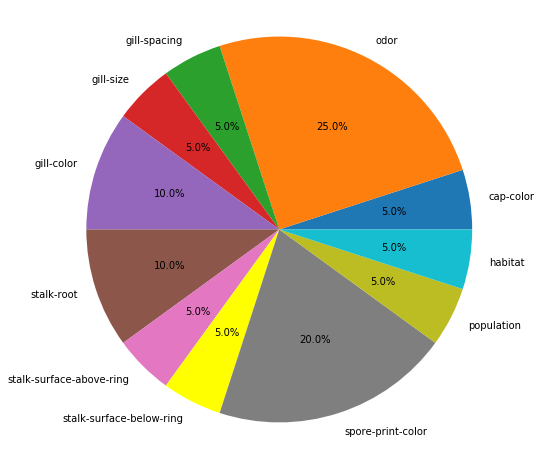

In [85]:
set_up_pie_chart(model_20) # note: this model had 100% accuracy, but possibly over-fits data.

                      |=============================|
                      | The Models' Feature Weights |
                      |=============================|


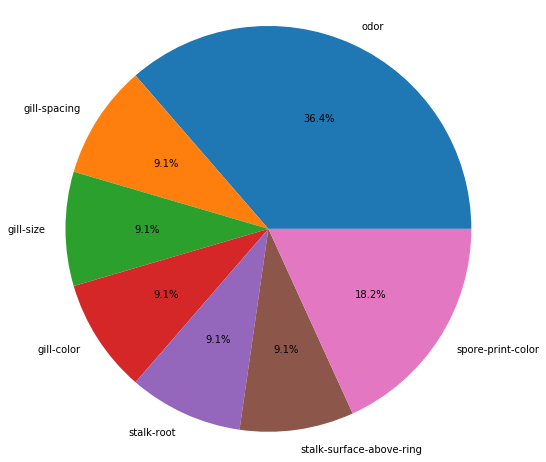

In [86]:
set_up_pie_chart(model_11)

Okay so it would seem as though Odor is the best predictor of whether a mushroom is poisonous or not, with spore colour coming in second and a bunch of gil features (size, colour, spacing, etc) taking spots three to five.
Before wrapping up this analysis we can do a little bit more digging:

   **QUESTION:** Odor (in general) is a good predictor of harmfulness but do the "bad" mushrooms have a particular smell?

In [88]:
odors = ['almond', 'anise', 'creosote', 'fishy', 'foul' , 'musty', 'no smell', 'pungent', 'spicy']
o = ['a','l','c','y','f','m','n','p','s']

# for each odor(x), count up instances where 'class' is e or p. 
odor_data = pd.DataFrame(columns=["e", "p"], index=o)
for i in odor_data.index:
    odor_data.loc[i] = data['class'].where(data['odor'] == i).value_counts()

odor_data = odor_data.rename(index={o[i]:odors[i] for i in range(len(odors))}, columns={'e': "Edible", "p":"Poisonous"})
odor_data.fillna(0)

,Edible,Poisonous
almond,400.0,0.0
anise,400.0,0.0
creosote,0.0,192.0
fishy,0.0,576.0
foul,0.0,2160.0
musty,0.0,36.0
no smell,3408.0,120.0
pungent,0.0,256.0
spicy,0.0,576.0


We only need to quickly glance at the table above in order to understand why our AdaBoost models picked out this feature. Likewise, this table helps explain why AdaBoost performed really well despite using a rather low number of estimators.

In short ordor seems to be an exceptionally strong indicator of a mushrooms edibaility; if it smells like creosote dont try it, but if it smells of almonds its most likely fine to munch on. 

Aright, what about the second most useful feature *'spore-print-color'* ?

In [89]:
colours = ['black', 'brown', 'buff', 'chocolate', 'green' , 'orange', 'purple', 'white', 'yellow']
oc = ['k','n','b','h','r','o','u','w','y']

# for each odor(x), count up instances where class is e or p. 
spore_data = pd.DataFrame(columns=["e", "p"], index=oc)
for i in spore_data.index:
    spore_data.loc[i] = data['class'].where(data['spore-print-color'] == i).value_counts()

spore_data = spore_data.rename(index={oc[i]:colours[i] for i in range(len(colours))}, columns={'e': "Edible", "p":"Poisonous"})
spore_data.fillna(0)

,Edible,Poisonous
black,1648.0,224.0
brown,1744.0,224.0
buff,48.0,0.0
chocolate,48.0,1584.0
green,0.0,72.0
orange,48.0,0.0
purple,48.0,0.0
white,576.0,1812.0
yellow,48.0,0.0


This time the data has a bit more noise but we can clearly see just by using our eyes a few patterns; chocolate and white coloured mushrooms are most likely harmful whereas black and brown mushrooms are probably okay. 

For those curious about the difference between chocolate and brown here's the best picture of spore prints I could find that illustrates the difference *(chocolate is on the left)*:

<img src="https://i1.wp.com/www.mushroomdiary.co.uk/wp-content/uploads/2011/09/spore-prints.jpg">


# Fin! #